# Introduction
## Dataset
Retrieved from [Shanks' Braille Charachters Datase](https://www.kaggle.com/shanks0465/braille-character-dataset) which consists of 60 images for each alphabet. Thus, a total of **1560** images.
### Dataset Description
**Title:** 
> Braille Character Dataset

**Description:** 
> This dataset was created for the purpose of training a CNN for Braille Character Recognition.

**Image Description:** 
> Each image is a 28x28 image in BW Scale.
> Each image name consists of the character alphabet and the number of the image 
> and the type of data augmentation it went through. (i.e whs - width height shift, rot - Rotation, dim - brightness)

**Dataset composition:**
> 26 characters * 3 Augmentations * 20 different images of different augmentation values (i.e different shift,rotational and brightness values.)
## Approach
## Refrences

### Libraries Import

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Input, SeparableConv2D, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


### Data Preperation
Since the data was already cleaned up and pre-processesed. The following code splits the images into two generators a training and a validation generator.

In [182]:
data = ImageDataGenerator(rotation_range=10, shear_range=10, validation_split=0.1)
training_images = data.flow_from_directory('./images/', target_size=(28,28), subset='training')
validation_images = data.flow_from_directory('./images/', target_size=(28, 28), subset='validation')

Found 1404 images belonging to 26 classes.
Found 156 images belonging to 26 classes.


#### Plotting the image

In [183]:
def plotImages(images):
    fig, axes = plt.subplots(1,10, figsize=(28,28))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)

    plt.tight_layout()
    plt.show()    



# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")


In [184]:

image_batch, label = training_images.next()
print("Total training images:", training_images.n)
print("Number of batches:", image_batch.shape[0])
print("Number of images in a batch:", len(training_images))

Total training images: 1404
Number of batches: 32
Number of images in a batch: 44


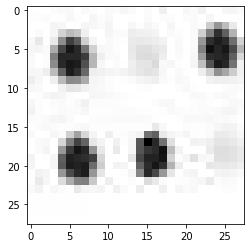

In [185]:
braille_a = image.load_img('./images/z/z1.JPG0rot.jpg')
plt.imshow(braille_a)


### Develop the model

In [186]:
print(training_images.image_shape)
# model = Sequential([Input(shape=(28, 28, 3)),
#                     Dense(64, activation='relu'),
#                     Dense(26, activation='softmax')
#                     ])

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam', metrics=['accuracy'])

# early_stopping = EarlyStopping(patience=20, verbose=1)


model = Sequential()
model.add(Input(shape=(28, 28, 3)))  #
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(GlobalMaxPooling2D())
model.add(Dense(64))
model.add(Dense(26, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
              
early_stopping = EarlyStopping(patience=20, verbose=1)


model.summary()


(28, 28, 3)
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 global_max_pooling2d_7 (Glo  (None, 64)               0         
 balMaxPooling2D)                                                
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 26)  

In [187]:
trained_model = model.fit(training_images,
                          validation_data=validation_images,
                          epochs=150,
                          batch_size=32,
                          callbacks=[early_stopping],
                          verbose=1)


Epoch 1/150
44/44 [==============================] - 2s 36ms/step - loss: 41.9403 - accuracy: 0.0285 - val_loss: 9.4115 - val_accuracy: 0.0577
Epoch 2/150
44/44 [==============================] - 1s 33ms/step - loss: 6.4376 - accuracy: 0.0613 - val_loss: 4.6433 - val_accuracy: 0.0833
Epoch 3/150
44/44 [==============================] - 2s 34ms/step - loss: 4.4959 - accuracy: 0.0833 - val_loss: 4.2211 - val_accuracy: 0.1218
Epoch 4/150
44/44 [==============================] - 1s 34ms/step - loss: 4.2186 - accuracy: 0.1026 - val_loss: 4.2522 - val_accuracy: 0.1346
Epoch 5/150
44/44 [==============================] - 2s 34ms/step - loss: 3.8087 - accuracy: 0.1311 - val_loss: 3.7133 - val_accuracy: 0.1346
Epoch 6/150
44/44 [==============================] - 1s 34ms/step - loss: 3.5224 - accuracy: 0.1496 - val_loss: 3.4462 - val_accuracy: 0.1667
Epoch 7/150
44/44 [==============================] - 2s 35ms/step - loss: 3.3859 - accuracy: 0.1681 - val_loss: 3.1167 - val_accuracy: 0.2179
Epoch